       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

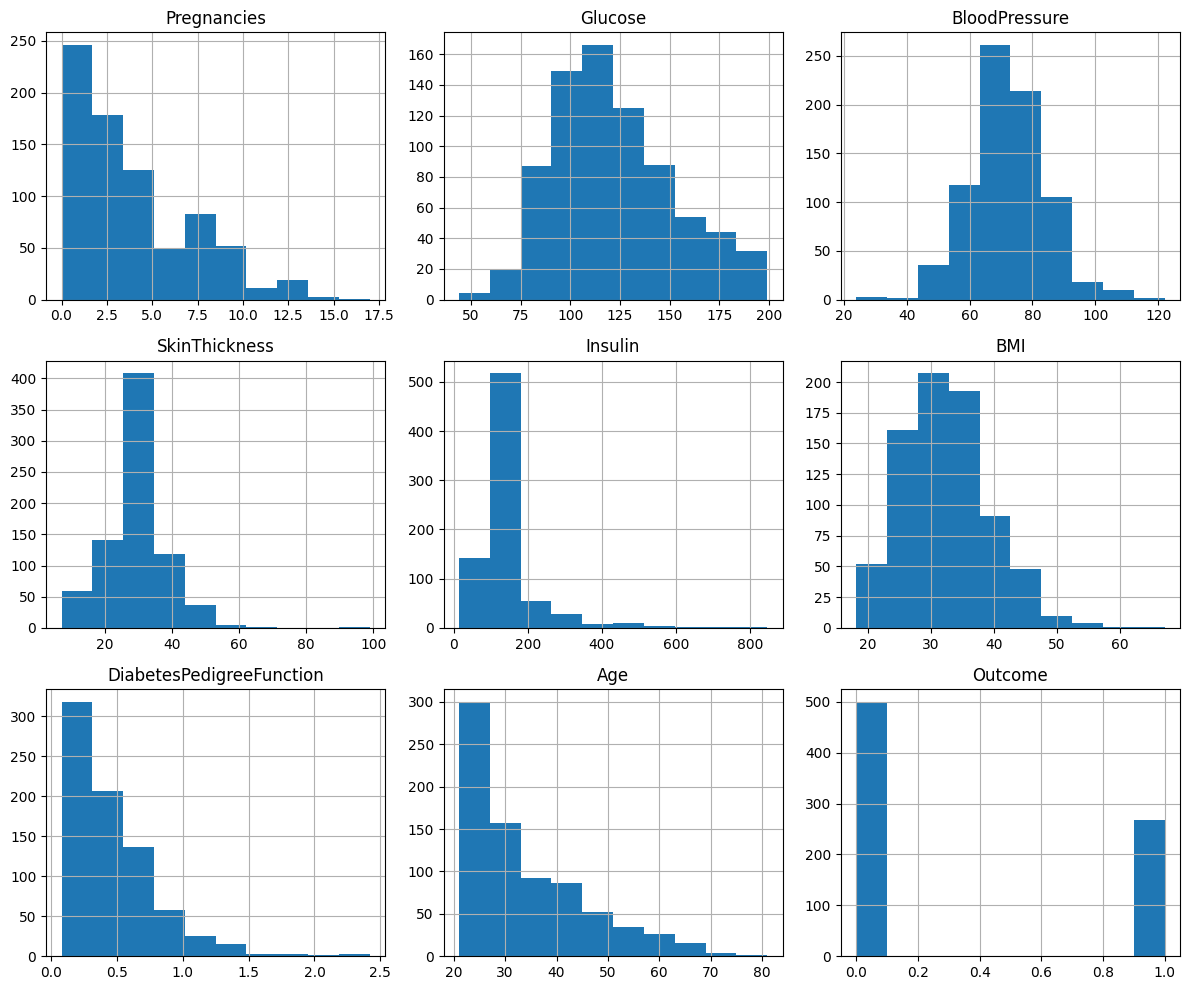

LR: 0.001, Iterations: 500 -> Accuracy: 0.7078, Precision: 0.5806, Recall: 0.6545, F1-Score: 0.6154
LR: 0.001, Iterations: 1000 -> Accuracy: 0.7078, Precision: 0.5806, Recall: 0.6545, F1-Score: 0.6154
LR: 0.001, Iterations: 2000 -> Accuracy: 0.7208, Precision: 0.6000, Recall: 0.6545, F1-Score: 0.6261
LR: 0.01, Iterations: 500 -> Accuracy: 0.7273, Precision: 0.6140, Recall: 0.6364, F1-Score: 0.6250
LR: 0.01, Iterations: 1000 -> Accuracy: 0.7403, Precision: 0.6364, Recall: 0.6364, F1-Score: 0.6364
LR: 0.01, Iterations: 2000 -> Accuracy: 0.7597, Precision: 0.6800, Recall: 0.6182, F1-Score: 0.6476
LR: 0.1, Iterations: 500 -> Accuracy: 0.7532, Precision: 0.6667, Recall: 0.6182, F1-Score: 0.6415
LR: 0.1, Iterations: 1000 -> Accuracy: 0.7532, Precision: 0.6667, Recall: 0.6182, F1-Score: 0.6415
LR: 0.1, Iterations: 2000 -> Accuracy: 0.7532, Precision: 0.6667, Recall: 0.6182, F1-Score: 0.6415


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Загрузка и предварительная обработка данных
file_path = "diabetes.csv"
data = pd.read_csv(file_path)

# Замена нулевых значений на NaN для указанных колонок
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Заполнение NaN медианными значениями
data[columns_with_zeros] = data[columns_with_zeros].fillna(data[columns_with_zeros].median())

# Проверка, что NaN отсутствуют
if data.isna().sum().sum() > 0:
    raise ValueError("В данных остались пропущенные значения!")

# Нормализация входных данных
X = data.drop('Outcome', axis=1)
X = (X - X.mean()) / X.std()
y = data['Outcome']

# 2. Получение и визуализация статистики
print(data.describe())

# Визуализация гистограмм
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 3. Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Реализация логистической регрессии
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Численно стабильная версия сигмоидной функции
        return np.where(z >= 0,
                        1 / (1 + np.exp(-z)),
                        np.exp(z) / (1 + np.exp(z)))

    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Градиентный спуск
            dw = np.dot(X.T, (predictions - y)) / n_samples
            db = np.sum(predictions - y) / n_samples

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]


# 5. Обучение модели
model = LogisticRegressionScratch(learning_rate=0.01, iterations=1000)
model.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = model.predict(X_test.to_numpy())

# 6. Исследование гиперпараметров
learning_rates = [0.001, 0.01, 0.1]
iterations_list = [500, 1000, 2000]
results = []

for lr in learning_rates:
    for iters in iterations_list:
        model = LogisticRegressionScratch(learning_rate=lr, iterations=iters)
        model.fit(X_train.to_numpy(), y_train.to_numpy())
        y_pred = model.predict(X_test.to_numpy())

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append((lr, iters, acc, prec, rec, f1))

# 7. Оценка модели
for result in results:
    print(
        f"LR: {result[0]}, Iterations: {result[1]} -> Accuracy: {result[2]:.4f}, Precision: {result[3]:.4f}, Recall: {result[4]:.4f}, F1-Score: {result[5]:.4f}")

  # Выводы
  ## Детальный анализ результатов

### **1. Влияние Learning Rate (LR)**

**LR = 0.001 (очень маленький):**
- Модель обучается очень медленно
- При 500 и 1000 итерациях - одинаковые результаты (0.7078 accuracy) → **модель не успела сойтись**
- При 2000 итерациях небольшое улучшение (0.7208 accuracy) → **требуется много итераций для сходимости**
- **Вывод:** Слишком маленький learning rate неэффективен для данного датасета

**LR = 0.01 (оптимальный):**
- Лучшие результаты среди всех комбинаций
- Постоянное улучшение с ростом итераций: 0.7273 → 0.7403 → **0.7597**
- Максимальный accuracy (0.7597) достигается при 2000 итерациях
- **Вывод:** Оптимальный баланс скорости и качества сходимости

**LR = 0.1 (большой):**
- Быстрая сходимость (уже при 500 итерациях достигает 0.7532)
- Дальнейшее увеличение итераций не улучшает результаты → **возможен перескок минимума или застревание**
- **Вывод:** Слишком большой learning rate приводит к преждевременной сходимости

---

### **2. Влияние количества итераций**

**Для LR = 0.001:**
- 500 итераций: недостаточно
- 1000 итераций: недостаточно
- 2000 итераций: начинает сходиться, но все еще хуже других LR

**Для LR = 0.01:**
- 500 итераций: хороший старт (0.7273)
- 1000 итераций: значительное улучшение (0.7403)
- 2000 итераций: наилучший результат (0.7597) → **итерации продолжают улучшать модель**

**Для LR = 0.1:**
- 500 итераций: уже достигнут максимум (0.7532)
- 1000 итераций: без изменений
- 2000 итераций: без изменений → **сходимость достигнута быстро, но возможно не в глобальном минимуме**

---

### **3. Trade-off между Precision и Recall**

**Интересная закономерность:**
- При увеличении LR и итераций **precision растет**, но **recall снижается**:
  - LR=0.001, Iter=2000: Precision=0.6000, Recall=0.6545
  - LR=0.01, Iter=2000: Precision=0.6800, Recall=0.6182
  - LR=0.1, Iter=500: Precision=0.6667, Recall=0.6182

**Анализ:**
- Модель становится более "консервативной" (меньше false positives, но больше false negatives)
- Для задачи диагностики диабета это может быть критично:
  - Высокий Recall важнее (лучше ложное предупреждение, чем пропущенный случай)
  - Наилучший Recall (0.6545) при LR=0.001, но за счет низкого Precision

---

### **4. F1-Score как компромиссная метрика**

**Топ-3 по F1-Score:**
1. **LR=0.01, Iter=2000**: F1=0.6476 (наилучший компромисс)
2. **LR=0.01, Iter=1000**: F1=0.6364
3. **LR=0.1, Iter=500**: F1=0.6415

**Важно:** Несмотря на одинаковый accuracy при LR=0.1, разный F1-Score указывает на разное распределение ошибок.

---

### **5. Стабильность результатов**

**Стабильные конфигурации:**
- LR=0.1: абсолютно стабильные результаты при любом количестве итераций
- LR=0.001: стабильны при 500-1000 итерациях (модель "застряла")

**Плавное улучшение:**
- LR=0.01: плавное улучшение всех метрик с ростом итераций → **наиболее предсказуемое поведение**

---

### **6. Ключевые инсайты**

1. **Оптимальная конфигурация**: LR=0.01, Iterations=2000
   - Наивысший Accuracy (0.7597)
   - Наивысший F1-Score (0.6476)
   - Хороший баланс Precision/Recall

2. **Эффект насыщения**:
   - При LR=0.1 модель достигает потолка качества уже на 500 итерациях
   - При LR=0.01 продолжает улучшаться до 2000 итераций

3. **Вычислительная эффективность**:
   - LR=0.1, Iter=500: быстрый результат (0.7532) за 500 итераций
   - LR=0.01, Iter=2000: лучший результат (0.7597), но требует в 4 раза больше вычислений

4. **Критичность гиперпараметров**:
   - Изменение LR от 0.001 до 0.01 дает прирост accuracy на **5.2%**
   - Дополнительные итерации при LR=0.01 дают прирост еще на **3.2%**
